In [15]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
titanic_df = pd.read_csv("titanic/train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
titanic_df[titanic_df["Age"] < 20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S


In [18]:
titanic_df.info() 
#check the number of not null value counts, here agre may have some null and Cabin has a lot of null values, which we should keep in mind for later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?

In [19]:
#1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

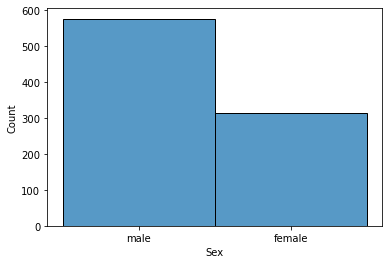

In [27]:
sns.histplot(x=titanic_df["Sex"], data=titanic_df, hue) #how many male and female passengers

<AxesSubplot:xlabel='Sex', ylabel='Count'>

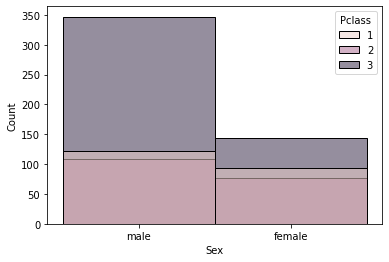

In [28]:
sns.histplot(x=titanic_df["Sex"], data=titanic_df, hue="Pclass")

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

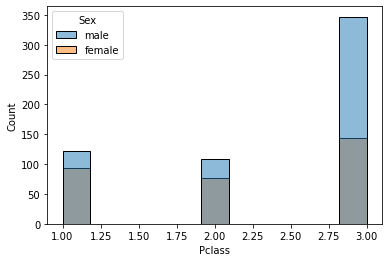

In [30]:
sns.histplot(x=titanic_df["Pclass"], data=titanic_df, hue="Sex")

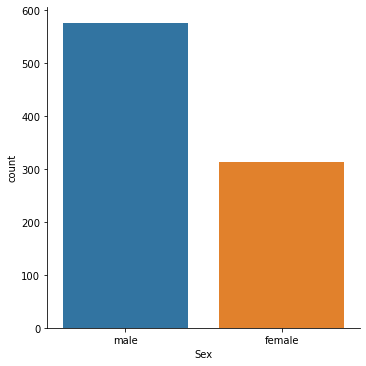

In [34]:
sns.catplot(x="Sex", data=titanic_df, kind="count") #how many male and female passengers

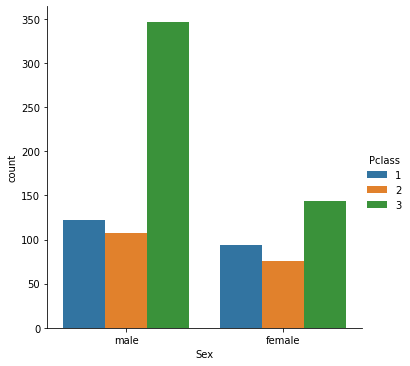

In [35]:
sns.catplot(x="Sex", data=titanic_df, kind="count", hue="Pclass")

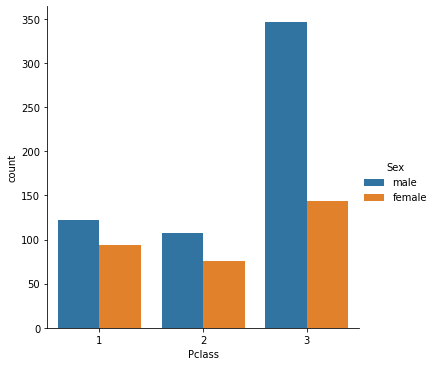

In [36]:
sns.catplot(x="Pclass", data=titanic_df, kind="count", hue="Sex")

In [37]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return sex

In [38]:
titanic_df["Person"] = titanic_df[["Age", "Sex"]].apply(male_female_child, axis=1)

In [41]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male


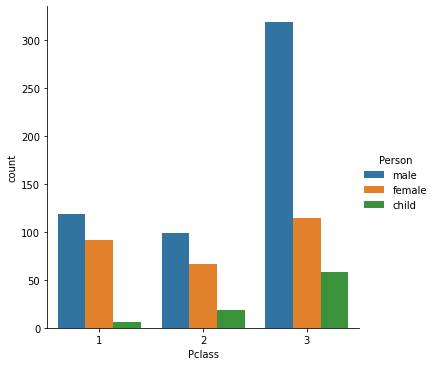

In [42]:
sns.catplot(x="Pclass", data=titanic_df, kind="count", hue="Person")

<AxesSubplot:>

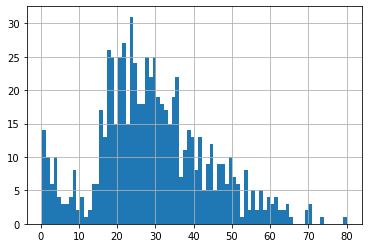

In [48]:
titanic_df["Age"].hist(bins=80)

In [53]:
titanic_df["Age"].mean()

29.69911764705882

In [50]:
titanic_df["Person"].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

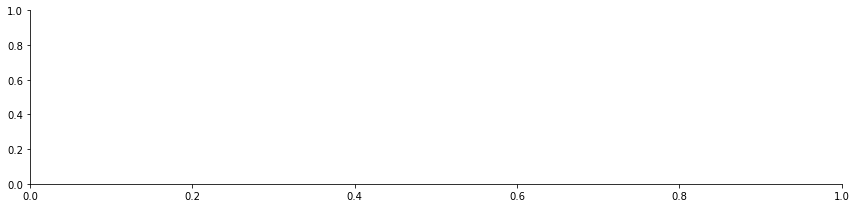

In [55]:
fig = sns.FacetGrid(titanic_df, hue="Sex", aspect=4)
fig

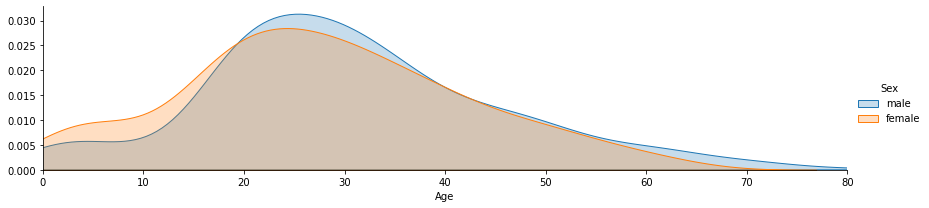

In [52]:
fig = sns.FacetGrid(titanic_df, hue="Sex", aspect=4)
fig.map(sns.kdeplot, "Age", shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

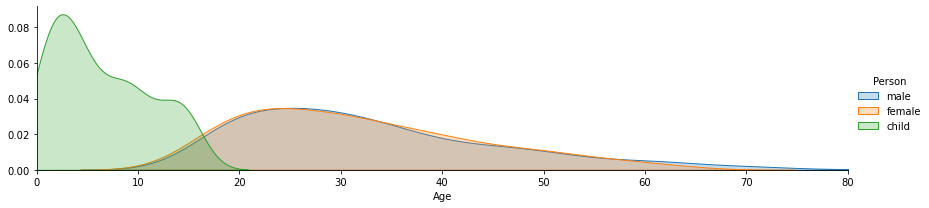

In [66]:
fig = sns.FacetGrid(titanic_df, hue="Person", aspect=4)
fig.map(sns.kdeplot, "Age", shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

2.) What deck were the passengers on and how does that relate to their class?

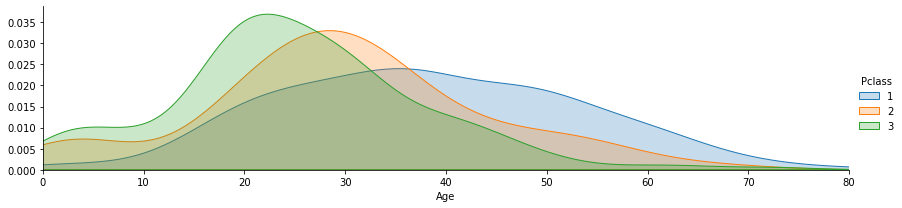

In [57]:
fig = sns.FacetGrid(titanic_df, hue="Pclass", aspect=4)
fig.map(sns.kdeplot, "Age", shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

In [58]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [59]:
deck = titanic_df["Cabin"].dropna()

In [61]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [68]:
levels = []

for level in deck:
    levels.append(level[0]) #loop deck and append first letter of level to the empty array levels
    
levels[0:5]

['C', 'C', 'E', 'G', 'C']

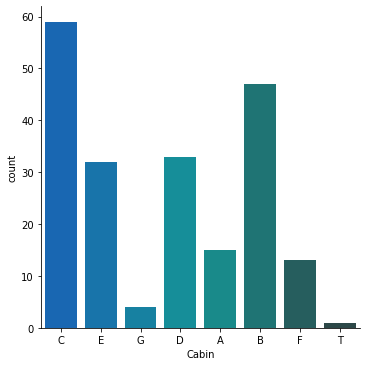

In [80]:
cabin_df = DataFrame(levels)
cabin_df.columns = ["Cabin"]
sns.catplot(x="Cabin", data=cabin_df, palette="winter_d", kind="count")

In [81]:
cabin_df = cabin_df[cabin_df.Cabin != "T"]

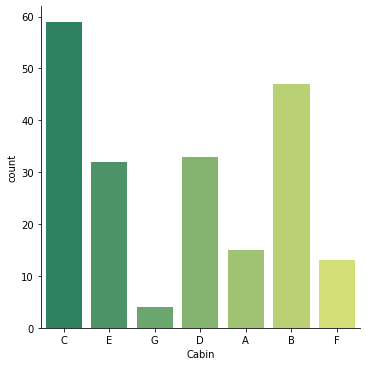

In [88]:
sns.catplot(x="Cabin", data=cabin_df, palette="summer", kind="count")

In [83]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


3.) Where did the passengers come from?

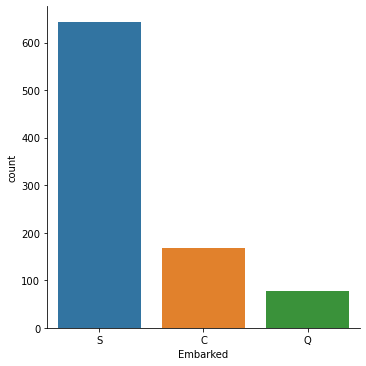

In [85]:
sns.catplot(x="Embarked", data=titanic_df, kind="count")

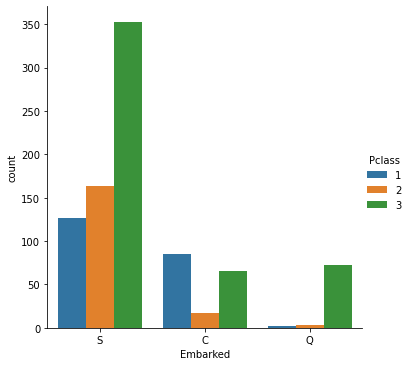

In [86]:
sns.catplot(x="Embarked", data=titanic_df, kind="count", hue="Pclass")

4.) Who was alone and who was with family?

In [102]:
#define what alone means
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [103]:
titanic_df["Alone"] = titanic_df["SibSp"] + titanic_df["Parch"]
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [104]:
titanic_df["Alone"]

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [105]:
titanic_df["Alone"].loc[titanic_df["Alone"] > 0]  = "With Family"
titanic_df["Alone"].loc[titanic_df["Alone"] == 0]  = "Alone"

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [106]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone


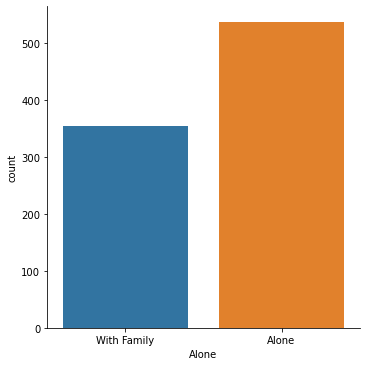

In [109]:
sns.catplot(x="Alone",data=titanic_df, kind="count")

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?

In [111]:
titanic_df["Survivor"] = titanic_df["Survived"].map({0:"No", 1:"Yes"})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


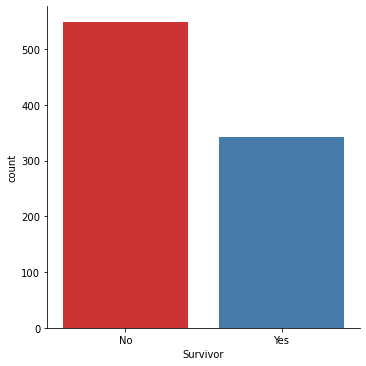

In [114]:
sns.catplot(x="Survivor", data=titanic_df, kind="count", palette="Set1")

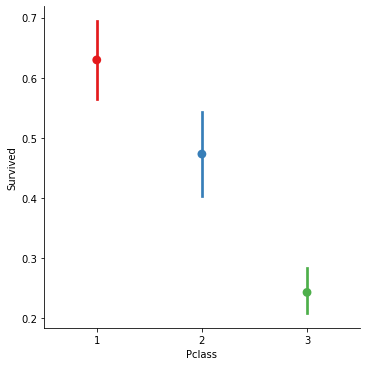

In [147]:
sns.catplot(x="Pclass",y="Survived", data=titanic_df, kind="point", palette="Set1")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

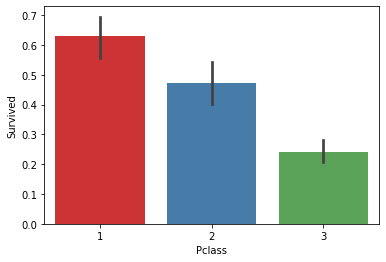

In [150]:
sns.barplot(x="Pclass",y="Survived", data=titanic_df, palette="Set1")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

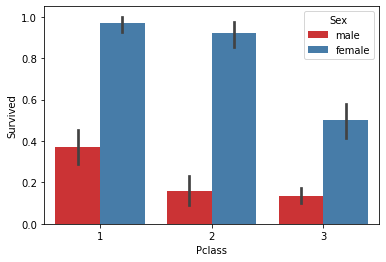

In [152]:
sns.barplot(x="Pclass",y="Survived", data=titanic_df, hue="Sex", palette="Set1")

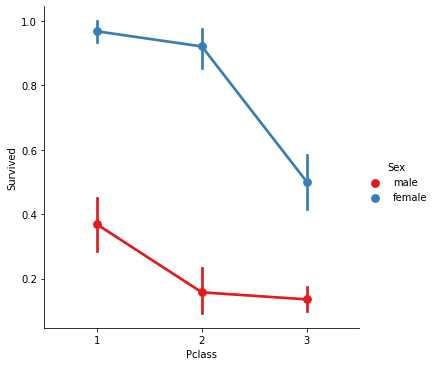

In [155]:
sns.catplot(x="Pclass",y="Survived", data=titanic_df, kind="point", palette="Set1", hue="Sex")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

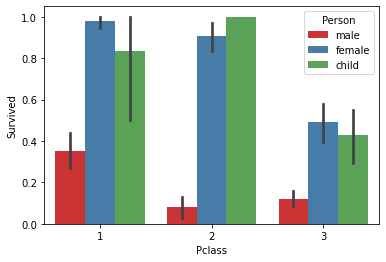

In [156]:
sns.barplot(x="Pclass",y="Survived", data=titanic_df, palette="Set1", hue="Person")

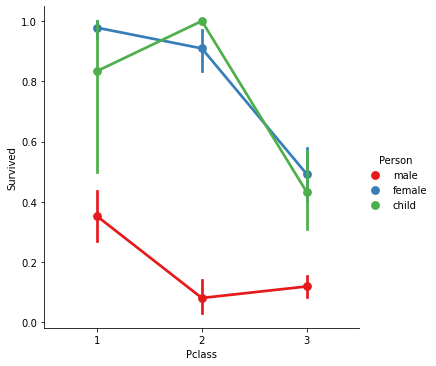

In [124]:
sns.catplot(x="Pclass",y="Survived", data=titanic_df, kind="point", palette="Set1", hue="Person")

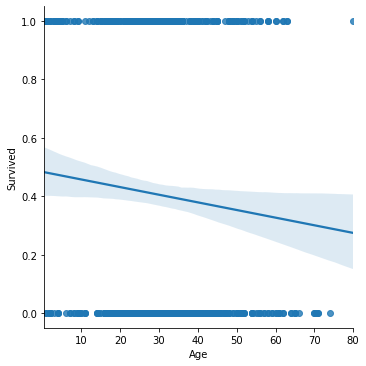

In [125]:
sns.lmplot(x="Age",y="Survived", data=titanic_df)

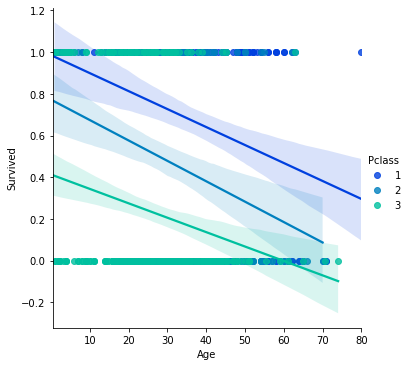

In [128]:
sns.lmplot(x="Age",y="Survived", data=titanic_df, hue="Pclass", palette="winter")

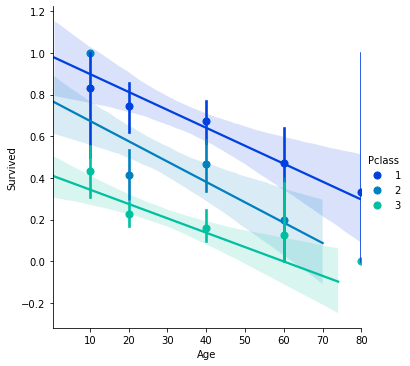

In [135]:
generations = [10,20,40,60,80]

sns.lmplot(x="Age",y="Survived", data=titanic_df, hue="Pclass", palette="winter", x_bins=generations)

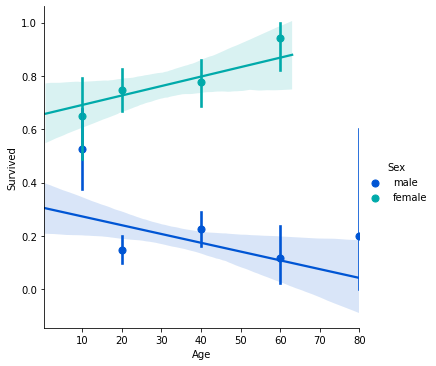

In [136]:
sns.lmplot(x="Age",y="Survived", data=titanic_df, hue="Sex", palette="winter", x_bins=generations)

1) Did the deck has an effect on their survival rates?

In [180]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Cabin_rank
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No,C


In [181]:
cabin_df

,Cabin
0,C
1,C
2,E
3,G
4,C
...,...
199,D
200,B
201,C
202,B


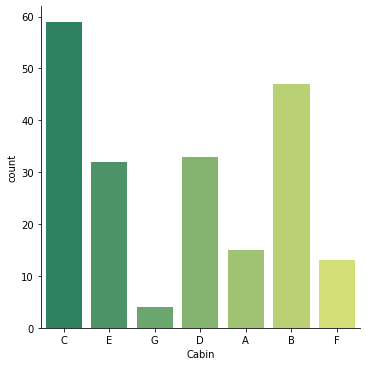

In [164]:
sns.catplot(x="Cabin", data=cabin_df, palette="summer", kind="count")

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

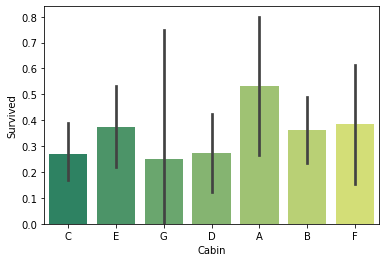

In [165]:
sns.barplot(x="Cabin", y=titanic_df["Survived"], data=cabin_df, palette="summer")

In [182]:
sns.lmplot(x="Cabin", y=titanic_df["Survived"], data=cabin_df)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: Invalid comparison between dtype=int64 and str

2) Did having family member increase the odds of survival?

In [139]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


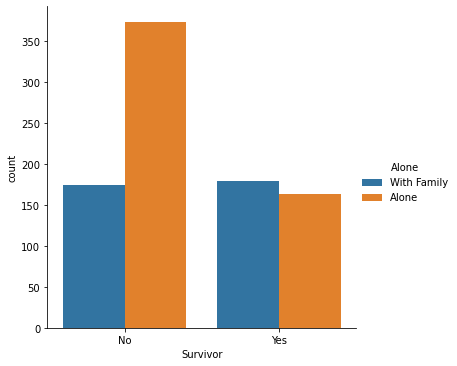

In [142]:
sns.catplot(x="Survivor", data=titanic_df, kind="count" , hue="Alone")

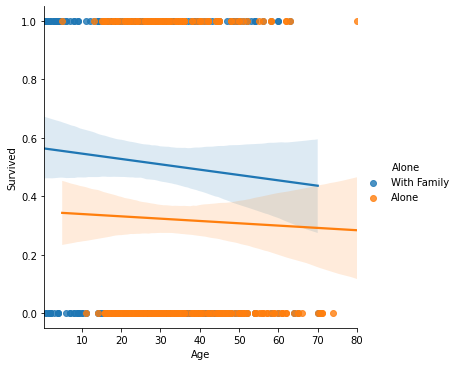

In [146]:
sns.lmplot(x="Age", y="Survived", data=titanic_df, hue="Alone")